The main topic I decided to explore is the sales of video games by genre, county, publisher, year, sales, and platform, and my goal is to figure out if there any relationhips between categories.

Database link : https://www.kaggle.com/datasets/gregorut/videogamesales

In [4]:
from matplotlib import pyplot as plt

In [6]:

import pandas as pd

df = pd.read_csv("/content/vgsales.csv")

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Three questions about this specific dataset are:
1. **What is the most popular genre in each region?**
2. **Which publishers have the highest total global sales?**
3. **What is the distribution of sales in North America, Europe, Japan, and other regions?**


In [7]:
'''
this wasnt one of my posed questions, but I wanted to get the year range
in the data set first so that I could analyze the questions better
'''
year_range = df['Year'].min(), df['Year'].max()
print(f"year range: {year_range[0]} to {year_range[1]}.")

year range: 1980.0 to 2020.0.


In [9]:
'''
 here I used the groupby method to sort genre between countries and get the sum of all of them
'''
region_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

# here is where the .idxmax method is used to get the most popular genre in each region
most_popular_genre_na = region_sales['NA_Sales'].idxmax()
most_popular_genre_eu = region_sales['EU_Sales'].idxmax()
most_popular_genre_jp = region_sales['JP_Sales'].idxmax()
most_popular_genre_other = region_sales['Other_Sales'].idxmax()
most_popular_genre_global = region_sales['Global_Sales'].idxmax()

# here im just printing the results in a more organized and consise format
print(f"Most popular genre in North America: {most_popular_genre_na}")
print(f"Most popular genre in Europe: {most_popular_genre_eu}")
print(f"Most popular genre in Japan: {most_popular_genre_jp}")
print(f"Most popular genre in Other regions: {most_popular_genre_other}")
print(f"Most popular genre globally: {most_popular_genre_global}")

Most popular genre in North America: Action
Most popular genre in Europe: Action
Most popular genre in Japan: Role-Playing
Most popular genre in Other regions: Action
Most popular genre globally: Action


***Q1: What is the most popular genre in each region?***

To solve this question I used the pandas dataframe.idxmax to get the maximum value in genre (ie. the genre that appears the most in each regional category), and printed them out as the most popular genre.

Based on the data, in the last 40 years, the most popular category overall is action, which is the most popular genre of video games in 4/5 categories.
The only different genre is Japan's top category, role-playing games, but when you take into consideration the fact that Japan is well known for alot of popular real world rpgs and simulators, it realistically makes sense.


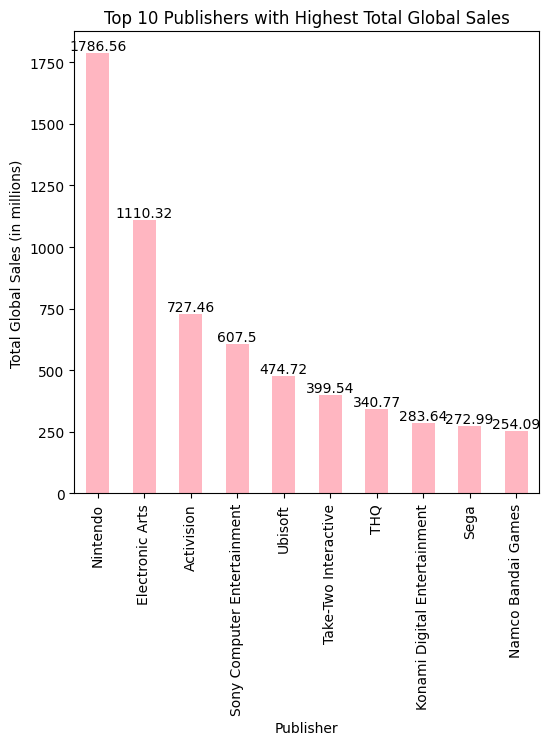

In [10]:
publisher_global_sales = df.groupby('Publisher')['Global_Sales'].sum()

"""
 here, I used sort_values method based on the pandas API refrence to sort the total global sales in descending order,
 and this is the variable I will use for my histogram
"""

sorted_publishers = publisher_global_sales.sort_values(ascending=False)


# pyplot figure method is used here to get the top 10 publishers globally
plt.figure(figsize=(6,6))
bars = sorted_publishers.head(10).plot(kind='bar', color='lightpink')
plt.title('Top 10 Publishers with Highest Total Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (in millions)')


for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()


In [11]:
sorted_publishers.describe()


,Global_Sales
count,578.000000
mean,15.407543
std,103.251959
min,0.010000
25%,0.070000
50%,0.320000
75%,1.630000
max,1786.560000


***Q2: Which publishers have the highest total global sales?***

To solve this question I wanted to get the top 10 publishers, so I used the .groupby method to get the sum of the publisher global sales values, sorted them from highest to lowest using sort_vales, and then created a bar graph to represent the categorical data.

Based on the chart, Nintendo has the highest global sales, with their maximum sales being 1786.56 million sales globally. This is 37.85% greater than Electronic Arts, which ranks #2 globally, and 99.15% greater than the other 578 publishers in the list, which all together have a average of 15.4 million sales. Overall, it can be inferred that throughout the years 1980-2020, nintendo was the most popular game publisher globally.

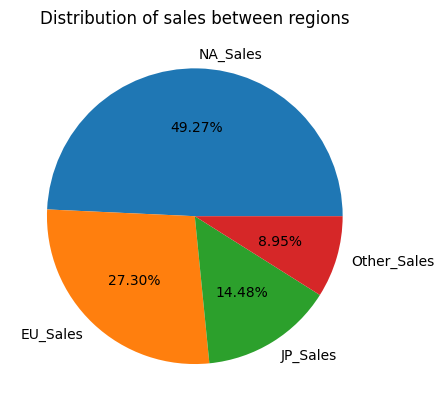

In [12]:
'''
first I used the df to retrive the sum of all total sale combined and used the
categories listed to create labels
'''
region_sales_sum = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
labels = region_sales_sum.index

# next, using pyplot I created the parameters for my pie chart

plt.pie(region_sales_sum, labels=labels, autopct = "%0.2f%%")
plt.title("Distribution of sales between regions")
plt.show()

***Q3: What is the distribution of sales in North America, Europe, Japan, and other regions?***

To solve this question, I used a pie chart so you can easily see the distrubution of the regions. Global sales isnt included in this pie chart since it included repeated data (the combined total of all regional sales). I used both pandas and pyplot to create the pie chart.

Based on the data and the pie chart representation, you can see that North Amercia has the highest percentage of sales, taking up almost 50% of the chart. Through this, it can be inferred that North America has a bigger market and a higher demand for video games. The sales for North America is 70.61% greater than the sales for Japan, 44.59% greater than European sales, and 81.83% greater than the sales for all other countries.